In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_points(pts):
    ## 获取左上右上左下右下的坐标点
    rect = np.zeros((4, 2), dtype='float32')
    # 其中左上的点的x y坐标的和最小，右下的坐标和最大
    # 首先计算四个坐标点的坐标和
    points_sum = np.sum(pts, axis=1)
    rect[0] = pts[np.argmin(points_sum)]
    rect[2] = pts[np.argmax(points_sum)]
    
    # 接下来获取右上左下坐标
    # 其中右上的坐标差的值较小，左下的坐标差的值较小
    substrct = np.diff(pts, axis=1)
    rect[1] = pts[np.argmin(substrct)]
    rect[3] = pts[np.argmax(substrct)]
    
    return rect

In [5]:
def transform(image, pts):
    rect = get_points(pts)
    # 左上，右上，右下，左下
    (tl, tr, br, bl) = rect
    
    # 获得透视变换后新图片的新宽度和新高度，运用两点坐标之间距离公式
    widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
    widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
    width = max(int(widthA), int(widthB))
    
    heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
    heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
    height = max(int(heightA), int(heightB))
    
    # 新图片的左上，右上，右下，左下坐标
    dst = np.array([[0,0], [width - 1, 0], [width - 1, height - 1], [0, height - 1]], dtype='float32')
    M = cv2.getPerspectiveTransform(rect, dst)
    warped = cv2.warpPerspective(image, M, (width, height))
    
    return warped

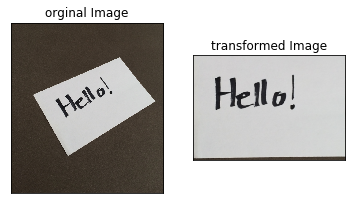

In [7]:
image = cv2.imread('example_01.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
pts = [(73, 239), (356, 117), (475, 265), (187, 443)]
warped = transform(image, pts)

plt.subplot(121)
plt.imshow(image)
plt.title('orginal Image')
plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(warped)
plt.title('transformed Image')
plt.xticks([]), plt.yticks([])
plt.show()

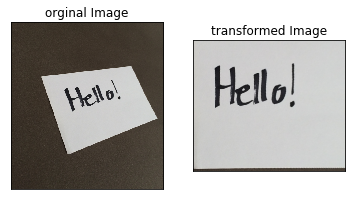

In [8]:
image = cv2.imread('example_02.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
pts = [(101, 185), (393, 151), (479, 323), (187, 441)]
warped = transform(image, pts)

plt.subplot(121)
plt.imshow(image)
plt.title('orginal Image')
plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(warped)
plt.title('transformed Image')
plt.xticks([]), plt.yticks([])
plt.show()

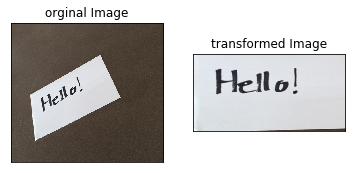

In [10]:
image = cv2.imread('example_03.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
pts = [(63, 242), (291, 110), (361, 252), (78, 386)]
warped = transform(image, pts)

plt.subplot(121)
plt.imshow(image)
plt.title('orginal Image')
plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(warped)
plt.title('transformed Image')
plt.xticks([]), plt.yticks([])
plt.show()